# The dynamics of Airbnb and San Francisco's rental market since 2015

Throughout our project, we will tell a story through our visualizations, about San Francisco's super expensive rental market, and Airbnb - an online, short-term rental marketplace.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import os
from datetime import timedelta, datetime
from PIL import Image
from wordcloud import WordCloud
import datetime as dt
mpl.rcParams['figure.dpi'] = 100

In [2]:
# Loading San Francisco Rent data
df_rent = pd.read_csv("Dataset/Rent_SF.csv", sep=";")
rents = pd.read_csv('Dataset/Zillow_data.csv')

# Loading data for Airbnb
df_201505 = pd.read_csv("Dataset/Airbnb/listings_201505.csv")
df_201509 = pd.read_csv("Dataset/Airbnb/listings_201509.csv")
df_201511 = pd.read_csv("Dataset/Airbnb/listings_201511.csv")
df_201512 = pd.read_csv("Dataset/Airbnb/listings_201512.csv")
df_201602 = pd.read_csv("Dataset/Airbnb/listings_201602.csv")
df_201604 = pd.read_csv("Dataset/Airbnb/listings_201604.csv")
df_201605 = pd.read_csv("Dataset/Airbnb/listings_201605.csv")
df_201606 = pd.read_csv("Dataset/Airbnb/listings_201606.csv")
df_201607 = pd.read_csv("Dataset/Airbnb/listings_201607.csv")
df_201608 = pd.read_csv("Dataset/Airbnb/listings_201608.csv")
df_201609 = pd.read_csv("Dataset/Airbnb/listings_201609.csv")
df_201610 = pd.read_csv("Dataset/Airbnb/listings_201610.csv")
df_201611 = pd.read_csv("Dataset/Airbnb/listings_201611.csv")
df_201612 = pd.read_csv("Dataset/Airbnb/listings_201612.csv")
df_201701 = pd.read_csv("Dataset/Airbnb/listings_201701.csv")
df_201702 = pd.read_csv("Dataset/Airbnb/listings_201702.csv")
df_201703 = pd.read_csv("Dataset/Airbnb/listings_201703.csv")
df_201704 = pd.read_csv("Dataset/Airbnb/listings_201704.csv")
df_201705 = pd.read_csv("Dataset/Airbnb/listings_201705.csv")
df_201706 = pd.read_csv("Dataset/Airbnb/listings_201706.csv")
df_201707 = pd.read_csv("Dataset/Airbnb/listings_201707.csv")
df_201708 = pd.read_csv("Dataset/Airbnb/listings_201708.csv")
df_201709 = pd.read_csv("Dataset/Airbnb/listings_201709.csv")
df_201710 = pd.read_csv("Dataset/Airbnb/listings_201710.csv")
df_201711 = pd.read_csv("Dataset/Airbnb/listings_201711.csv")
df_201712 = pd.read_csv("Dataset/Airbnb/listings_201712.csv")
df_201801 = pd.read_csv("Dataset/Airbnb/listings_201801.csv")
df_201802 = pd.read_csv("Dataset/Airbnb/listings_201802.csv")
df_201803 = pd.read_csv("Dataset/Airbnb/listings_201803.csv")
df_201804 = pd.read_csv("Dataset/Airbnb/listings_201804.csv")
df_201805 = pd.read_csv("Dataset/Airbnb/listings_201805.csv")
df_201807 = pd.read_csv("Dataset/Airbnb/listings_201807.csv")
df_201808 = pd.read_csv("Dataset/Airbnb/listings_201808.csv")
df_201809 = pd.read_csv("Dataset/Airbnb/listings_201809.csv")
df_201810 = pd.read_csv("Dataset/Airbnb/listings_201810.csv")
df_201811 = pd.read_csv("Dataset/Airbnb/listings_201811.csv")
df_201812 = pd.read_csv("Dataset/Airbnb/listings_201812.csv")
df_201901 = pd.read_csv("Dataset/Airbnb/listings_201901.csv")
df_201902 = pd.read_csv("Dataset/Airbnb/listings_201902.csv")
df_201903 = pd.read_csv("Dataset/Airbnb/listings_201903.csv")
df_201904 = pd.read_csv("Dataset/Airbnb/listings_201904.csv")
df_201905 = pd.read_csv("Dataset/Airbnb/listings_201905.csv")
df_201906 = pd.read_csv("Dataset/Airbnb/listings_201906.csv")
df_201907 = pd.read_csv("Dataset/Airbnb/listings_201907.csv")
df_201908 = pd.read_csv("Dataset/Airbnb/listings_201908.csv")
df_201909 = pd.read_csv("Dataset/Airbnb/listings_201909.csv")
df_201910 = pd.read_csv("Dataset/Airbnb/listings_201910.csv")
df_201911 = pd.read_csv("Dataset/Airbnb/listings_201911.csv")
df_201912 = pd.read_csv("Dataset/Airbnb/listings_201912.csv")
df_202001 = pd.read_csv("Dataset/Airbnb/listings_202001.csv")
df_202002 = pd.read_csv("Dataset/Airbnb/listings_202002.csv")
df_202003 = pd.read_csv("Dataset/Airbnb/listings_202003.csv")
df_202004 = pd.read_csv("Dataset/Airbnb/listings_202004.csv")
df_202005 = pd.read_csv("Dataset/Airbnb/listings_202005.csv")
df_202006 = pd.read_csv("Dataset/Airbnb/listings_202006.csv")
df_202007 = pd.read_csv("Dataset/Airbnb/listings_202007.csv")
df_202008 = pd.read_csv("Dataset/Airbnb/listings_202008.csv")
df_202009 = pd.read_csv("Dataset/Airbnb/listings_202009.csv")

## Let's start with the evolution of Airbnb listings over the years for San Francisco.

In [3]:
df_201505["year"] = 2015
df_201605["year"] = 2016
df_201705["year"] = 2017
df_201805["year"] = 2018
df_201905["year"] = 2019
df_202005["year"] = 2020

df2 = pd.concat([df_201505, df_201605, df_201705, df_201805, df_201905, df_202005])

df3 = df2.groupby("year")["year"].size().reset_index(name="listings")

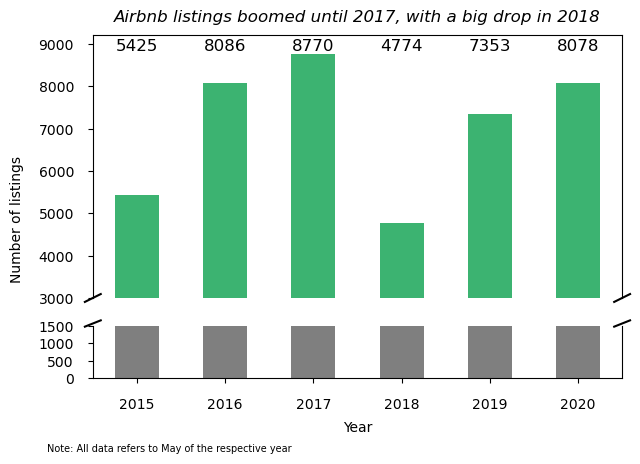

In [4]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True ,gridspec_kw={'height_ratios': [10, 2]})
f.tight_layout(pad=1)

df3.set_index("year").listings.plot.bar(ax=ax2, rot= 0, color = "tab:gray")
df3.set_index("year").listings.plot.bar(ax=ax, rot = 0, color = "mediumseagreen")
ax2.set_ylim(0, 1500)
ax.set_ylim(3000, 9200)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', pad=10, bottom= False)
ax2.tick_params(axis='both', which='major', pad=10)

loc = plticker.MultipleLocator(base=500)
ax2.yaxis.set_major_locator(loc)

ax.set_ylabel("Number of listings", size = "medium")
ax.yaxis.set_label_coords(-0.13,0.30)
ax2.set_xlabel("Year", size = "medium")
ax2.xaxis.set_label_coords(0.5, -0.8)

plt.figtext(0,-0.09, "Note: All data refers to May of the respective year", fontsize=7, horizontalalignment="left")
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + 7*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + 7*d), **kwargs)  # bottom-right diagonal
ax.set_title("Airbnb listings boomed until 2017, with a big drop in 2018", pad = 10, size = "large", fontstyle = "italic", color = "black")

for i in range(len(df3["listings"])):
    ax2.text(i, 9480,df3["listings"][i], fontsize = 12, verticalalignment = "center", horizontalalignment = "center")

We see an upwards trend overall! But...
#### __What happened in 2018?!__

When we first took on this challenge, we expected a surge in Airbnb listings over the years, reaching at least a constant level, but never decreasing.<br>
Turns out in 2018 there was a big decrease in the number of listings. 

According to the newspaper [San Francisco Chronicle](https://www.sfchronicle.com/business/article/Airbnb-listings-in-San-Francisco-plunge-by-half-12502075.php), in 2018 legislation with restrictive rules for Airbnb came into place. The owners of Airbnb rental sites had to undergo a registration with the city, and because of the bureaucracy involved, many failed to comply with regulations in time and thus, saw their listings dropped from Airbnb. 

There has been a recovery after hosts adapted to this legal hurdle, seen in 2019 and 2020.

## Now, let us take a look at the neighbhourhoods with most listings and the price categories.

In [5]:
df2["Price Range"] = np.nan

In [6]:
df2["price"].describe()

count    42486.000000
mean       232.093443
std        438.669517
min          0.000000
25%        100.000000
50%        155.000000
75%        250.000000
max      30000.000000
Name: price, dtype: float64

In [7]:
for i in range(len(df2)):
    if df2["price"].iloc[i] <= 100:
        df2["Price Range"].iloc[i] = "cheap"
    elif df2["price"].iloc[i] >=250:
        df2["Price Range"].iloc[i] = "medium"
    else:
        df2["Price Range"].iloc[i] = "expensive"

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
df3= df2.groupby(["neighbourhood", "Price Range"])[["neighbourhood","Price Range"]].size().reset_index(name="counts")
df3.set_index("neighbourhood", inplace=True)
df4 = df3.pivot(columns="Price Range", values="counts")
df4 = df4.reindex(["cheap","medium","expensive"],axis = 1)
df4["total_listings"] = df4.sum(axis=1)
df4.sort_values("total_listings", ascending= False, inplace= True)
total_listings = df4["total_listings"]
df4 = df4.drop("total_listings", axis=1)

first_10 = df4.head(10)
first_10 = first_10.iloc[::-1]

second_10 = df4.iloc[10:20]
second_10 = second_10.iloc[::-1]

third_10 = df4.iloc[20:30]
third_10 = third_10.iloc[::-1]

last_7 = df4.iloc[30:37]
last_7 = last_7.iloc[::-1]

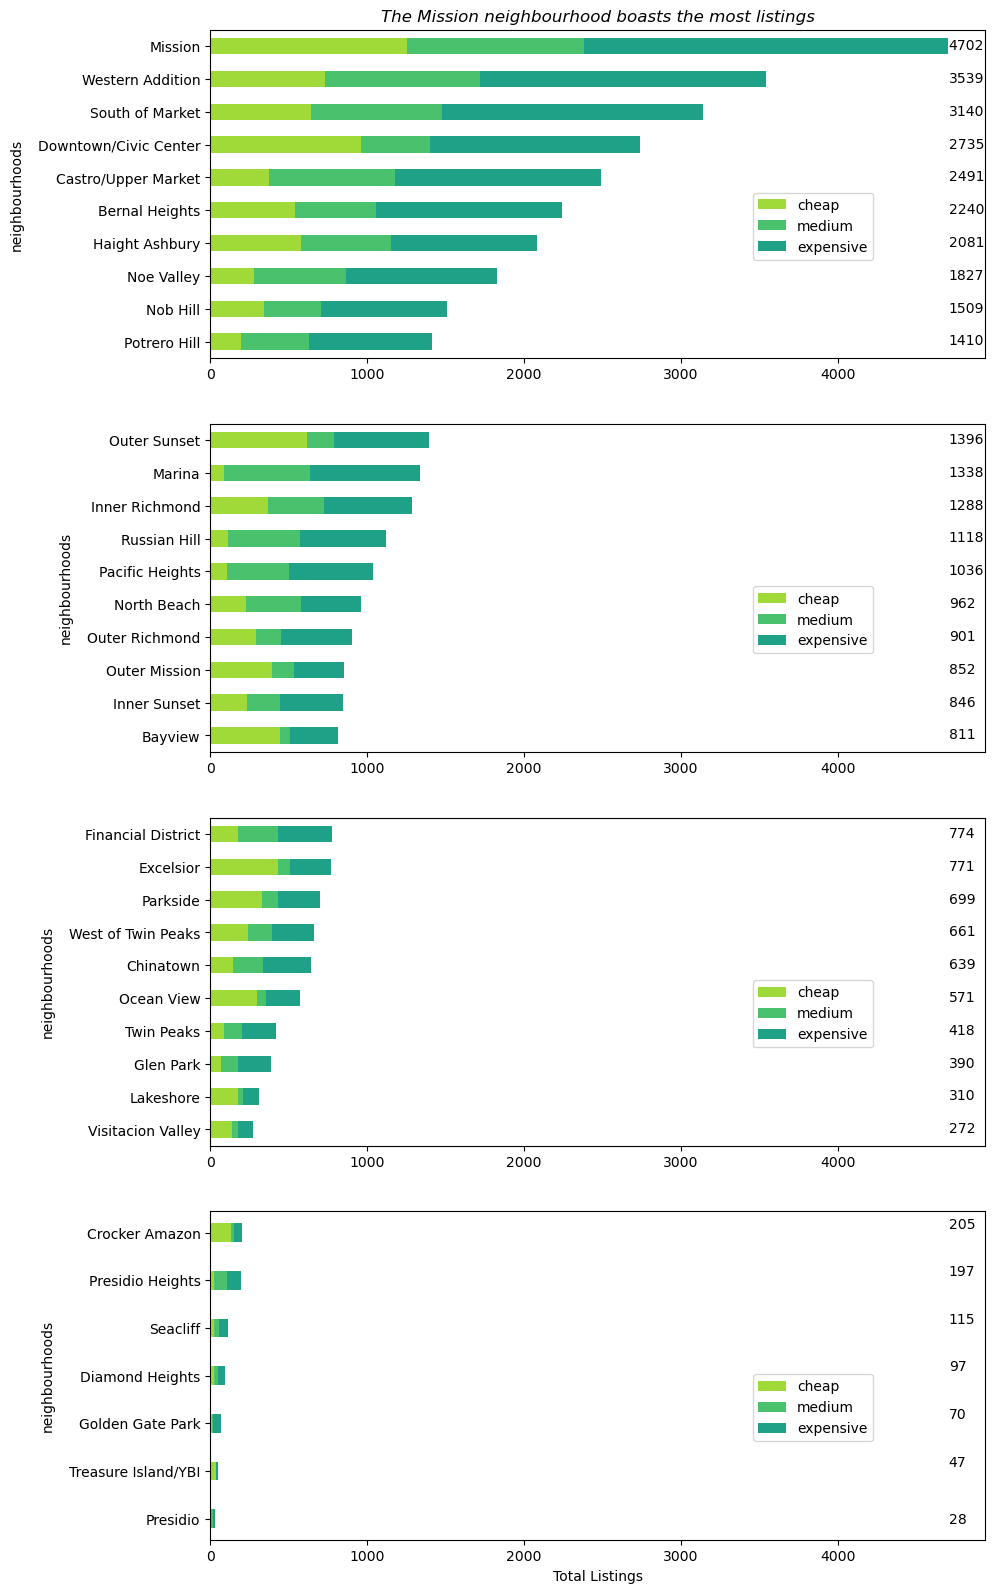

In [9]:
pal= sns.color_palette("viridis_r")

fig, sp = plt.subplots(4,1, sharex=True)

fig.set_figwidth(10)
fig.set_figheight(20)
first_10.plot(kind="barh", stacked=True, ax=sp[0], color = pal)

second_10.plot(kind="barh", stacked = True, ax = sp[1], color = pal)

third_10.plot(kind="barh", stacked = True, ax = sp[2], color = pal)

last_7.plot(kind= "barh", stacked = True, ax= sp[3], color = pal, width = 0.39)
    
sp[3].set_xlabel("Total Listings")

sp[0].set_title("The Mission neighbourhood boasts the most listings", fontstyle = "italic")

for i in range(4):
    sp[i].set_ylabel("neighbourhoods", labelpad = 10)

for i in range(3):
    sp[i].xaxis.set_tick_params(labelbottom=True)

for i in range(4):
    sp[i].legend(loc = (0.7,0.3))

for i in range(11):
    sp[0].annotate(total_listings[i], xy=(4705, 8.9-i))

for i in range(11):
    sp[1].annotate(total_listings[10+i], xy=(4705, 8.9-i))
    
for i in range(11):
    sp[2].annotate(total_listings[20+i], xy=(4705, 8.9-i))    
    
sp[3].annotate(total_listings[36], xy=(4705, -0.1))   
sp[3].annotate(total_listings[35], xy=(4705, 1.1))   
sp[3].annotate(total_listings[34], xy=(4705, 2.1))   
sp[3].annotate(total_listings[33], xy=(4705, 3.1))   
sp[3].annotate(total_listings[32], xy=(4705, 4.1))   
sp[3].annotate(total_listings[31], xy=(4705, 5.1))   
sp[3].annotate(total_listings[30], xy=(4705, 6.1));  

 <h4>Mission is the neighbourhood with most listings by a large difference. It also has the most cheap listings of any neighbhourhood.*</h4>

There are 37 neighbourhoods in San Francisco, and that explains why we had to break this graph 4 in four. Otherwise, it would be very hard to see anything!




*_In absolute numbers._ 

# The market for long-term rentals in San Francisco

In the media a large offer of Airbnb apartments is often associated with rising prices for long-term rentals. In this section we first look at the rental market exclusively for long-term apartments that are not rented through Airbnb and outline the price development. Then we compare the monthly prices for long-term Airbnbs with the average monthly prices for long-term apartments. 

In [10]:
df5 = pd.concat([df_201505, df_201605, df_201705, df_201805, df_201905, df_202005])

df6 = df5.groupby("year")["year"].size().reset_index(name="listings")

In [11]:
df_rent["Month"]=pd.to_datetime(df_rent["Month"], format = "%m-%Y")
df_rent.set_index("Month", inplace = True)

In [12]:
SF_rents=rents.loc[rents['MsaName']=='San Francisco, CA']

# Transforming the rental dataset to obtain averages per month
SF=SF_rents.drop(['RegionID','RegionName','SizeRank','MsaName'],axis=1)
SF.columns= pd.to_datetime(SF.columns)
average_per_month=pd.DataFrame(SF.mean(axis=0)).rename(columns={0:'MonthlyAverageRents'})

In [13]:
average_per_month = average_per_month[:"2019-12-01"]

In [14]:
df_rent_19 = df_rent["2015-01-01":"2019-12-01"]
df_rent_19.index.rename("Year",inplace=True)
df_rent_19 = pd.concat([df_rent_19, average_per_month], axis=1).reindex(df_rent_19.index)
df_rent_19.drop("AllBeds", axis = 1, inplace = True)
df_rent_19.columns = ["2 Bedrooms", "3 Bedrooms", "Monthly Average"]
df_r_mean_19 = df_rent_19.groupby(df_rent_19.index.map(lambda t: t.year)).mean()
df_r_mean_19.index.rename("Year",inplace=True)

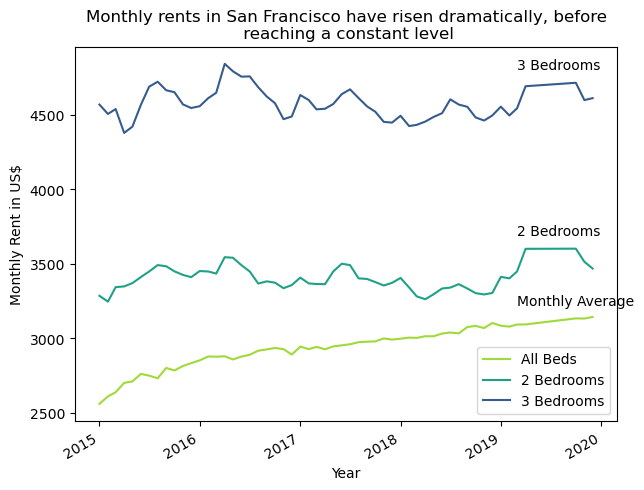

In [15]:
fig,sp = plt.subplots(1,1,figsize = (7,5.5));
df_rent_19.plot(y="Monthly Average", ax=sp , label="All Beds", color=pal[0])
df_rent_19.plot(y="2 Bedrooms",ax = sp, label = "2 Bedrooms", color = pal[2])
df_rent_19.plot(y="3 Bedrooms", ax = sp, label = "3 Bedrooms", color = pal[4])
plt.ylabel("Monthly Rent in US$")
plt.title("Monthly rents in San Francisco have risen dramatically, before\n reaching a constant level")
last_month = df_rent_19.last("6M")
for i in ["2 Bedrooms","3 Bedrooms","Monthly Average"]:
    plt.text("2019-03-01",last_month[i][0]+90, i)

The graphs show the monthly prices for long-term rentals in the years from 2011 to the end of 2019 in San Francisco. It can be seen that the rents for one and two bedroom apartments have increased significantly in the years 2011 to 2016. In the following years until the end of 2019, the rent level has remained more or less the same. 

In [16]:
df5_long = df5[df5["minimum_nights"]>29]
df5_long["prices_m"] = 30*df5_long["price"]
df5_lm =  df5_long.groupby("year").mean()
df5_lm = df5_lm[:5]

<ipython-input-16-5b161a9a9315>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_long["prices_m"] = 30*df5_long["price"]


# What influence does the market for AirBnB apartments have on the rental market?

We have already worked out that the market for AirBnB apartments in San Francisco has grown strongly between 2015 and 2019. With the exception of a slump in 2018, the number of apartments offered through the website has been increasing steadily. 
In order to analyze the impact of AirBnB on the rental market, we have limited ourselves to AirBnB apartments with a minimum rental period of more than 30 days, as we believe that they are mainly in competition with the traditional rental market. 
From the remaining AirBnB apartments we have calculated the annual average of the monthly rents and compared them with the monthly long-term rents.


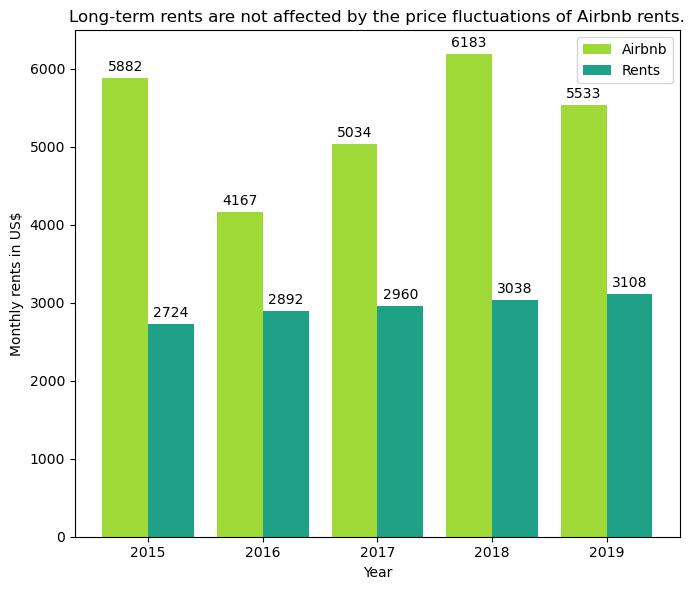

In [17]:
x = np.arange(len(df_r_mean_19.index))
w = 0.40

fig, ax = plt.subplots(figsize = (7,6))
Airbnb = ax.bar(x - w/2, df5_lm["prices_m"].astype(int) , w, label="Airbnb", color =pal[0])
Rents = ax.bar(x + w/2, df_r_mean_19["Monthly Average"].astype(int), w, label="Rents", color = pal[2])

ax.set_ylabel("Monthly rents in US$")
ax.set_xlabel("Year")
ax.set_title("Long-term rents are not affected by the price fluctuations of Airbnb rents.")
ax.set_xticks(x)
ax.set_xticklabels(df_r_mean_19.index)
ax.legend()

for p in Airbnb:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')
for p in Rents:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')

fig.tight_layout()
plt.show()

The bar chart shows that the average monthly Airbnb rents are very volatile in the years from 2015 to 2019. The prices on the classic rental market are very constant during this period and are not affected by the price fluctuations of AirBnB apartments. 

## Did the increase in Airbnb popularity also lead to an increase in prices and the number of reviews for listings in San Francisco?

As teased in the title, this part takes a look at how the ever increasing popularity of Airbnb affected the number of average reviews and the average price for listings in San Francisco.

There are two scenarios that might have enfolded over time:

#### Scenario 1:

- Both the number of average ratings and the average prices could have risen over the years, as the popularity of Airbnb and a rise of demand enabled providers to raise their prices continually. With a rise of demand, the average number of reviews should have increased as well, since the regularity and frequency of the bookings for rooms and appartments must have gone up.

#### Scenario 2:

- There might be no clear development and trend for both the avg. number of reviews and prices over time, since the Airbnb market is volatile and mostly used by inexperienced individuals whose goal is to earn some money on the side, and not to obtain the biggest profit possible. Such individuals usualy offer their rooms and apartments infrequently and sporadically, meaning that they also don't obtain a rise in the number of reviews quickly.

In [18]:
dfStacked = pd.concat([df_201505, df_201605, df_201705, df_201805, df_201905])

#Used so far

dfNoReviews = dfStacked.groupby("year")["number_of_reviews"].mean().reset_index(name="Number of Reviews")
dfPrices = dfStacked.groupby("year")["price"].mean().reset_index(name="Average Price")
dfRoomTypePrice = dfStacked.groupby(['room_type', 'year'])["price"].mean().reset_index(name="Average Price")

## The development of both avg. reviews and prices from 2015 until 2019

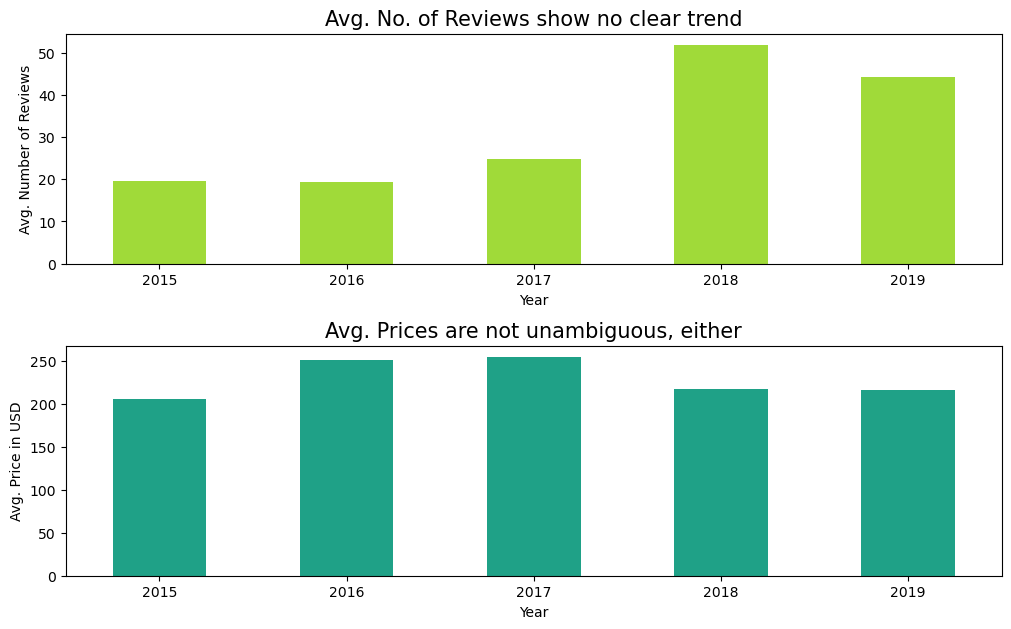

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10*0.618), constrained_layout=True)

dfNoReviews.plot(x = 'year', y = 'Number of Reviews', ax=ax[0], legend=None, kind= "bar", color=pal[0], rot= 0)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Avg. Number of Reviews")
ax[0].set_title("Avg. No. of Reviews show no clear trend",fontsize=15)

dfPrices.plot(x = 'year', y = 'Average Price', ax=ax[1], legend=None, kind= "bar", color=pal[2], rot = 0)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Avg. Price in USD")
ax[1].set_title("Avg. Prices are not unambiguous, either",fontsize=15);

The average number of Reviews in San Francisco doesn't show any proper Trend from 2015 throughout 2019 - While there is a tremendous rise in average Reviews from 2016 to 2018, that same development gets evaporated again the year after, in 2019.

We see a similar development for the average Prices of Listings on Airbnb. While a growth in avg. Prices occurred from 2015 until 2017, prices started to decline in 2018 again, with 2019 once more showing a decline compared to the previous year.


#### As it turns out, Scenario 2 seems to be the likelier one:

As mentioned above, the reason for such unclear trends in both number of average Reviews and average Prices might lie in the fact that the market for listings in Airbnb is fairly volatile, with people offering their rooms and apartments only periodically and irregularly, thus creating no possibility for the Airbnb market to solidify any growth or proper trend in both reviews and prices.

# Change of Word Frequency over the years

Word Clouds have become a prominent way of visually representing text data. They usually focus on single words, and the importance of each listed word is shown with font size or color. This form of Visualization is useful for quickly perceiving the most prominent terms to determine its relative prominence.

In this section, we will use Word Clouds to assess the most prominent and frequent words of Airbnb Listings in San Francisco.

It is also interesting to see whether the most commonly used words in a listings' title have changed over the years.

In order to get a brief look whether there was any tremendous change or not, this sub-section will provide two wordclouds :

- One wordcloud from the initial year 2015
- One recent wordcloud from the year 2019

By doing this, one can get a brief overview of the most prominent words used in Airbnb Listings, as well as the changes of the word's frequencies throughout the years in a fancy manner.

In [20]:
def pc(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
wordcloud = WordCloud(width = 1000, height = 660, random_state=1, background_color='lavenderblush', colormap='copper', collocations=False).generate(' '.join(df_201505['name']))

wordcloud2 = WordCloud(width = 1000, height = 660, random_state=1, background_color='aliceblue', colormap='ocean', collocations=False).generate(' '.join(df_201905['name']))

# Most frequent Words in the listings of 2015

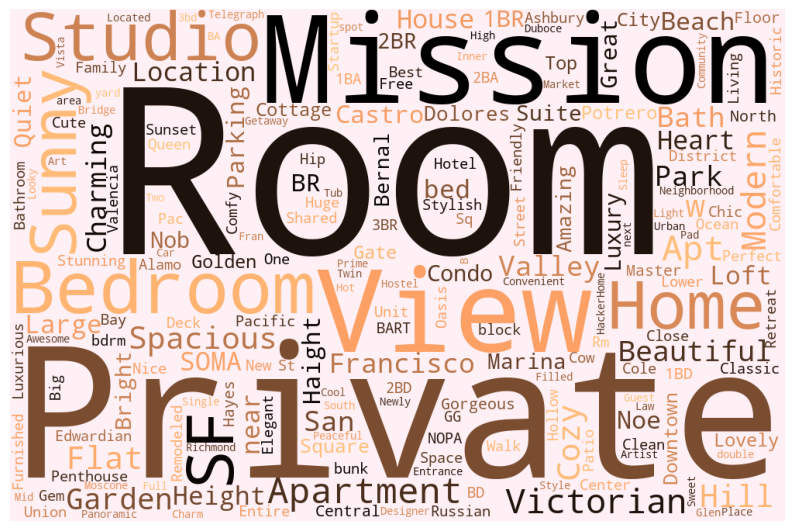

In [21]:
pc(wordcloud)

# Most frequent words in the listings of 2019

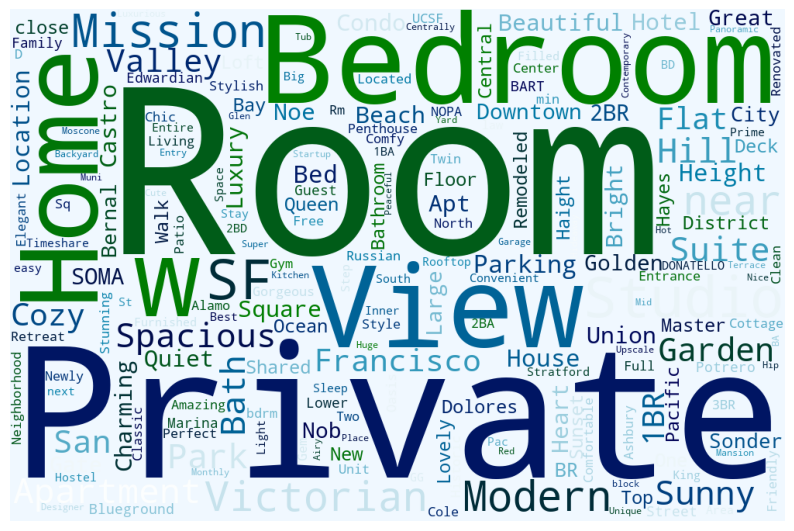

In [22]:
pc(wordcloud2)

# There doesn't seem to be any tremendous change for the most frequent words from 2015 until 2019

As one might have guessed, there doesn't seem to be any tremendous change - Fairly basic words such as "Private, "Room", "Home", "Bedroom", "Studio", or "View" are dominating both lists, since such words tend to be the most important ones when creating a listing for Airbnb.

The biggest occurring change is most likely happening on the adjectives used to describe a Home or Room: The popularity and frequency of usage of words such as "cozy", "charming" or "stunning" changes over the years, so that's where you can most likely find the biggest deviations in usage for the descriptions and titles of Airbnb-Listings.

## Now, let's analyse if Airbnb influcenced the local rental prices in San Francisco

In this part, we will look at the effects of Airbnb increasing presence in San Francisco on the rental prices of the city. There are two main hypotheses ragarding this subject: 
- the effect might come from the number of Airbnb available in the city: if there are more Airbnb available and an important demand, there might be an incentive for people to rent their flats using the online platform instead of classical rental options.
- the effect might arise from the fluctuations in Airbnb prices: as Airbnb are becoming more expensive, the rental market might follow the same path and the prices might skyrocket.

__Notes__: Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock.

In order to better observe and conclude about the possible effects of Airbnb on the rental prices in San Francisco, we decided to plot the following correlations: rental prices with airbnb prices, and rental prices with number of available airbnb. Using correlation is a way to identfy if one variable influcences the other one and in what manner.

First, we asked ourselves if the prices of Airbnbs in San Francisco influenced the prices of the rents in the city. We can expect that, for example, if Airbnb became more expensive the rents followed the same curve and increased too. In order to check this hypothesis, we can study the correlation between the prices of Airbnb nights and rents in San Francisco. We should also be able to check this assumption visually by plotting a scatter plot of AirBnb prices and rental prices, across time. If the prices of Airbnb and rents in SF evolve at the same pace, we can then assume a correlation.

In [23]:
# Only loooking at San Francisco
SF_rents2=rents.loc[rents['MsaName']=='San Francisco, CA']

# Transforming the rental dataset to obtain averages per month
SF=SF_rents2.drop(['RegionID','RegionName','SizeRank','MsaName'],axis=1)
SF.columns= pd.to_datetime(SF.columns)
average_per_month=pd.DataFrame(SF.mean(axis=0)).rename(columns={0:'MonthlyAverageRents'})
average_per_month=average_per_month[12:] #not considering the year 2014

In [24]:
#Adding a column with the date to differenciate the years once concacenated
df_201505['Date']=pd.to_datetime("2015-05")
df_201509['Date']=pd.to_datetime("2015-09")
df_201511['Date']=pd.to_datetime("2015-11")
df_201512['Date']=pd.to_datetime("2015-12")
df_201602['Date']=pd.to_datetime("2016-02")
df_201604['Date']=pd.to_datetime("2016-04")
df_201605['Date']=pd.to_datetime("2016-05")
df_201606['Date']=pd.to_datetime("2016-06")
df_201607['Date']=pd.to_datetime("2016-07")
df_201608['Date']=pd.to_datetime("2016-08")
df_201609['Date']=pd.to_datetime("2016-09")
df_201610['Date']=pd.to_datetime("2016-10")
df_201611['Date']=pd.to_datetime("2016-11")
df_201612['Date']=pd.to_datetime("2016-12")
df_201701['Date']=pd.to_datetime("2017-01")
df_201702['Date']=pd.to_datetime("2017-02")
df_201703['Date']=pd.to_datetime("2017-03")
df_201704['Date']=pd.to_datetime("2017-04")
df_201705['Date']=pd.to_datetime("2017-05")
df_201706['Date']=pd.to_datetime("2017-06")
df_201707['Date']=pd.to_datetime("2017-07")
df_201708['Date']=pd.to_datetime("2017-08")
df_201709['Date']=pd.to_datetime("2017-09")
df_201710['Date']=pd.to_datetime("2017-10")
df_201711['Date']=pd.to_datetime("2017-11")
df_201712['Date']=pd.to_datetime("2017-12")
df_201801['Date']=pd.to_datetime("2018-01")
df_201802['Date']=pd.to_datetime("2018-02")
df_201803['Date']=pd.to_datetime("2018-03")
df_201804['Date']=pd.to_datetime("2018-04")
df_201805['Date']=pd.to_datetime("2018-05")
df_201807['Date']=pd.to_datetime("2018-07")
df_201808['Date']=pd.to_datetime("2018-08")
df_201809['Date']=pd.to_datetime("2018-09")
df_201810['Date']=pd.to_datetime("2018-10")
df_201811['Date']=pd.to_datetime("2018-11")
df_201812['Date']=pd.to_datetime("2018-12")
df_201901['Date']=pd.to_datetime("2019-01")
df_201902['Date']=pd.to_datetime("2019-02")
df_201903['Date']=pd.to_datetime("2019-03")
df_201904['Date']=pd.to_datetime("2019-04")
df_201905['Date']=pd.to_datetime("2019-05")
df_201906['Date']=pd.to_datetime("2019-06")
df_201907['Date']=pd.to_datetime("2019-07")
df_201908['Date']=pd.to_datetime("2019-08")
df_201909['Date']=pd.to_datetime("2019-09")
df_201910['Date']=pd.to_datetime("2019-10")
df_201911['Date']=pd.to_datetime("2019-11")
df_201912['Date']=pd.to_datetime("2019-12")
df_202001['Date']=pd.to_datetime("2020-01")
df_202002['Date']=pd.to_datetime("2020-02")
df_202003['Date']=pd.to_datetime("2020-03")
df_202004['Date']=pd.to_datetime("2020-04")
df_202005['Date']=pd.to_datetime("2020-05")
df_202006['Date']=pd.to_datetime("2020-06")
df_202007['Date']=pd.to_datetime("2020-07")
df_202008['Date']=pd.to_datetime("2020-08")
df_202009['Date']=pd.to_datetime("2020-09")


# Combining everything in one dataframe
airbnb = pd.DataFrame(pd.concat([df_201505,df_201509,df_201511,df_201512,df_201602,df_201604,df_201605,df_201606,df_201607,df_201608,df_201609,df_201610,df_201611,df_201612,df_201701,df_201702,df_201703 ,df_201704,df_201705,df_201706,df_201707,df_201708,df_201709,df_201710,df_201711,df_201712,df_201801,df_201802,df_201803,df_201804,df_201805 ,df_201807,df_201808 ,df_201809,df_201810 ,df_201811 ,df_201812,df_201901 ,df_201902 ,df_201903 ,df_201904 ,df_201905 ,df_201906,df_201907,df_201908,df_201909,df_201910,df_201911,df_201912,df_202001,df_202002,df_202003,df_202004 ,df_202005,df_202006,df_202007,df_202008,df_202009]))

# Computing the average price and average number of available Airbnb per month in SF
airbnb_mean=airbnb.groupby('Date')['price'].mean().reset_index(name='Avg price Airbnb').set_index('Date')
airbnb_number=airbnb.groupby('Date')['price'].size().reset_index(name='Number Airbnb').set_index('Date')

# Merging all the dataframes into one
merge= average_per_month.join(airbnb_mean)
merge= merge.join(airbnb_number)
merge.dropna(inplace=True)

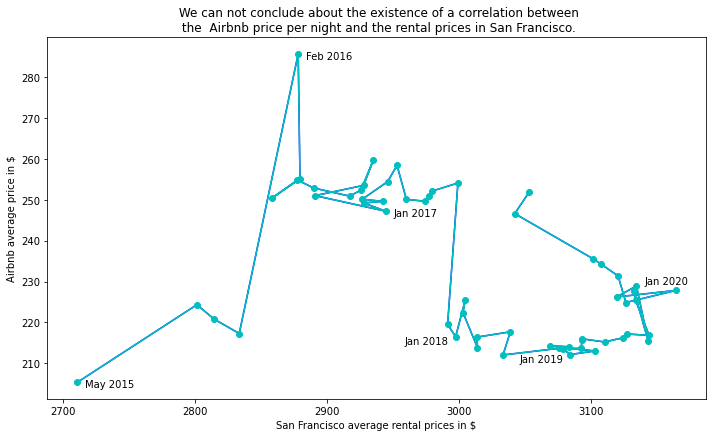

In [25]:
%matplotlib inline

#Plotting the average price of Airbnbs and the rental prices in SF
fig,ax=plt.subplots(figsize=(10,10*0.618))
ax.plot(merge["MonthlyAverageRents"],merge["Avg price Airbnb"],label="Monthly rental prices and airbnb prices", color="b")
ax.plot(merge["MonthlyAverageRents"],merge["Avg price Airbnb"],color="c", marker=".", markersize=12, label="Monthly rental prices and airbnb prices")
ax.set_ylabel("Airbnb average price in $", fontsize=10,rotation='vertical')
ax.set_xlabel("San Francisco average rental prices in $", fontsize=10)
ax.set_title(" We can not conclude about the existence of a correlation between\n the  Airbnb price per night and the rental prices in San Francisco." ,fontsize=12);

# Adding the dates in the graph for a better interpretation of it
x1= merge.loc[[pd.to_datetime('2015-05-01'),pd.to_datetime('2016-02-01'),pd.to_datetime('2017-01-01')]]['MonthlyAverageRents']
y1=merge.loc[[pd.to_datetime('2015-05-01'),pd.to_datetime('2016-02-01'),pd.to_datetime('2017-01-01')]]["Avg price Airbnb"]
label1 = ["May 2015", "Feb 2016", "Jan 2017"]
x2= merge.loc[[pd.to_datetime('2018-01-01'),pd.to_datetime('2019-01-01')]]['MonthlyAverageRents']
y2=merge.loc[[pd.to_datetime('2018-01-01'),pd.to_datetime('2019-01-01')]]["Avg price Airbnb"]
label2 = ["Jan 2018",'Jan 2019']
x3= merge.loc[[pd.to_datetime('2020-01-01')]]['MonthlyAverageRents']
y3=merge.loc[[pd.to_datetime('2020-01-01')]]["Avg price Airbnb"]
label3 = ['Jan 2020']

for x_pos, y_pos, label in zip(x1, y1, label1):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(8,-2),     
                textcoords='offset points', 
                ha='left',         
                va='center')
for x_pos, y_pos, label in zip(x2, y2, label2):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(-7,-5),     
                textcoords='offset points', 
                ha='right',         
                va='center')
for x_pos, y_pos, label in zip(x3, y3, label3):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(8,5),     
                textcoords='offset points', 
                ha='left',         
                va='center') 
fig.set_tight_layout(True)

### Interpretation
It is difficult to have a clear statement on a possible correlation between the average price of Airbnb and the rental prices in San Francisco while looking at the above graph. We can not see clear tendencies arising as from one month to the other the coefficient of the slope changes.
As per answer to our hypothesis, given our datasets, there is no clear correlation between Airbnb prices and rental prices in San Francisco.

The second hypothesis is that the rental prices in San Franciso fluctuate due to the number variation of available Airbnbs. For example, if the number of Airbnb increases we can expect the rental prices to go up as more people might rent an appartment and then put it on Airbnb as it may generate some profit.

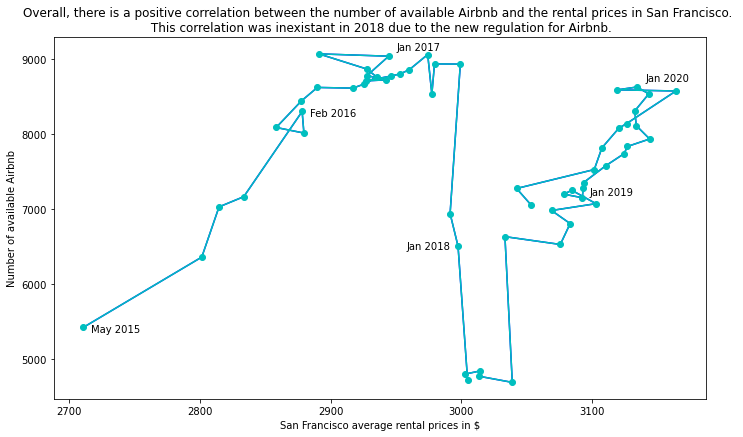

In [26]:
%matplotlib inline

#Plotting the available number of Airbnb and the rental prices in SF
fig,ax=plt.subplots(figsize=(10,10*0.618))
ax.plot(merge["MonthlyAverageRents"], merge["Number Airbnb"],label="Monthly rental prices and # of airbnb available", color="b")
ax.plot(merge["MonthlyAverageRents"], 
         merge["Number Airbnb"],color="c", marker=".", markersize=12, label="Monthly rental prices and # of airbnb available")
ax.set_ylabel("Number of available Airbnb", fontsize=10,rotation='vertical')
ax.set_xlabel("San Francisco average rental prices in $", fontsize=10)
ax.set_title("Overall, there is a positive correlation between the number of available Airbnb and the rental prices in San Francisco. \n This correlation was inexistant in 2018 due to the new regulation for Airbnb." ,fontsize=12);

# Adding the dates in the graph
x1=merge.loc[[pd.to_datetime('2015-05-01'),pd.to_datetime('2016-02-01')]]['MonthlyAverageRents']
y1=merge.loc[[pd.to_datetime('2015-05-01'),pd.to_datetime('2016-02-01')]]["Number Airbnb"]
label1 = ["May 2015", "Feb 2016"]
x2=merge.loc[[pd.to_datetime('2017-01-01'),pd.to_datetime('2020-01-01')]]['MonthlyAverageRents']
y2=merge.loc[[pd.to_datetime('2017-01-01'),pd.to_datetime('2020-01-01')]]["Number Airbnb"]
label2 = ["Jan 2017",'Jan 2020']
x3=merge.loc[[pd.to_datetime('2018-01-01')]]['MonthlyAverageRents']
y3=merge.loc[[pd.to_datetime('2018-01-01')]]["Number Airbnb"]
label3 = ["Jan 2018"]
x4=merge.loc[[pd.to_datetime('2019-01-01')]]['MonthlyAverageRents']
y4=merge.loc[[pd.to_datetime('2019-01-01')]]["Number Airbnb"]
label4 = ['Jan 2019']
for x_pos, y_pos, label in zip(x1, y1, label1):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(8,-2),     
                textcoords='offset points', 
                ha='left',         
                va='center')  
for x_pos, y_pos, label in zip(x2, y2, label2):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(8,9),     
                textcoords='offset points', 
                ha='left',         
                va='center')
for x_pos, y_pos, label in zip(x3, y3, label3):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(-8,0),     
                textcoords='offset points', 
                ha='right',         
                va='center')
for x_pos, y_pos, label in zip(x4, y4, label4):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(18,-2),     
                textcoords='offset points', 
                ha='left',         
                va='center')  
fig.set_tight_layout(True)

### Interpretation
We can divide the analysis of the above graph in four parts.
First, from 2015 until 2017, the rental price and the number of available Airbnb are positively correlated meaning that when one is increasing the other one is too. 
Second part, from November 2017 to June 2018, there is an important negative correlation as the number of Airbnb dropped but the average rental prices continued to increase slowly. 
Third part, from July 2018 to beginning of 2020, we can notice again a tendency looking like a positive correlation as the number of Airbnb increases while the average prices are.
Fourth part might illustrate the COVID-19 disruption as both the number of Airbnb and the rental prices are decreasing.

# People are traveling less due to COVID-19 - but are they using Airbnb less?

The COVID-19 pandemic has had broad and far-reaching effects in every city and every industry. The pandemic really hit San Franscico in early March and the rest of United States shortly after. We would expect to see a sharp drop in Airbnb occupancy due to the pandemic as the country went into lockdown and travel was discouraged or even prohibited. The Airbnb data set does not contain data on occupancy, but it does contain a metric for "Reviews per Month." If people aren't using Airbnb as much then we would expect hosts to decide it isn't worth it and remove their listing, or perhaps decrease the price. If people are staying at Airbnbs less then they would be leaving less reviews - so that can give us a sense of if occupancy has decreased. 

In [27]:
pv = pd.pivot_table(average_per_month, index=average_per_month.index.month, columns=average_per_month.index.year,
                    values='MonthlyAverageRents', aggfunc='sum')
pv.index.name='Month'

df_202001["month"] = 1
df_202002["month"] = 2
df_202003["month"] = 3
df_202004["month"] = 4
df_202005["month"] = 5
df_202006["month"] = 6


df8 = pd.concat([df_202006, df_202005, df_202004, df_202003, df_202002, df_202001])

df9 = df8.groupby("month")["month"].size().reset_index(name="listings")

df10 = df8.groupby(['month'])['price'].mean().reset_index(name="avgprice")

dfRPM = df8.groupby(['month'])['reviews_per_month'].mean().reset_index(name="reviewspermonth")

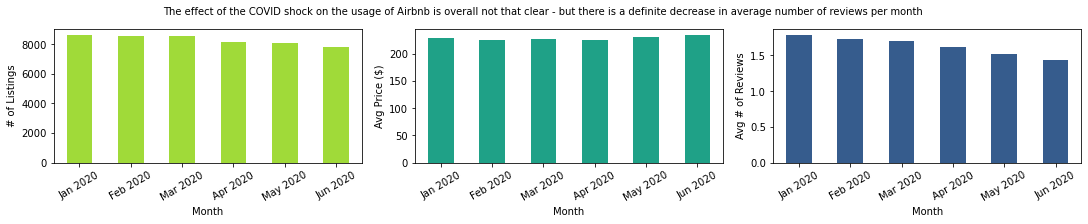

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), constrained_layout=True)
fig.suptitle('The effect of the COVID shock on the usage of Airbnb is overall not that clear - but there is a definite decrease in average number of reviews per month ', fontsize=10)


df9.plot(x = 'month', y = 'listings', ax=ax[0], legend=None, kind= "bar", color=pal[0])
ax[0].set_xlabel("Month")
ax[0].set_ylabel("# of Listings")

df10.plot(x = 'month', y = 'avgprice', ax=ax[1], legend=None, kind= "bar", color=pal[2])
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Avg Price ($)")

dfRPM.plot(x = 'month', y = 'reviewspermonth', ax=ax[2], legend=None, kind= "bar", color=pal[4])
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Avg # of Reviews");

labels = ["Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020"]
ax[0].set_xticklabels(labels, rotation = 30)
ax[1].set_xticklabels(labels, rotation = 30)
ax[2].set_xticklabels(labels, rotation = 30);

The number of listings has not droppped dramatically since COVID - which makes sense as hosts are likely slow to adjust to decreased demand and if they have already gone to the trouble of setting up their Airbnb there would significant losses if they just abandoned it. The average price has gone up slightly overtime - perhaps hosts are able to charge more now since only people traveling are those who really need to so they are willing to pay a higher cost. Only the reviews per month shows the decreasing trend we expected. Less people staying in a place means less reviews, so perhaps from this metric was can say there has been a slight downtown trend in Airbnb usage since the start of the pandemic. 

Another plausible hypothesis, is that people may be travelling less but have shifted to using Airbnb for other reasons such as have a larger space to quarentine in or get away from family members has they try to work from home.

# Demand for Airbnb may be unchanged - but clearly demand for long term rentals has declined

In [29]:
data2015=pv[2015].reset_index(name="Values")
data2016=pv[2016].reset_index(name="Values")
data2017=pv[2017].reset_index(name="Values")
data2018=pv[2018].reset_index(name="Values")
data2019=pv[2019].reset_index(name="Values")
data2020=pv[2020].reset_index(name="Values")

labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

for month in data2015["Month"]:
    data2015["Month"] = labels
for month in data2016["Month"]:
    data2016["Month"] = labels
for month in data2017["Month"]:
    data2017["Month"] = labels
for month in data2018["Month"]:
    data2018["Month"] = labels
for month in data2019["Month"]:
    data2019["Month"] = labels
for month in data2020["Month"]:
    data2020["Month"] = labels
    
data2015.set_index("Month", inplace=True)
data2016.set_index("Month", inplace=True)
data2017.set_index("Month", inplace=True)
data2018.set_index("Month", inplace=True)
data2019.set_index("Month", inplace=True)
data2020.set_index("Month", inplace=True)

data2015 = data2015.unstack().reset_index().drop("level_0", axis=1).rename(columns = {0: "Value"})
data2016 = data2016.unstack().reset_index().drop("level_0", axis=1).rename(columns = {0: "Value"})
data2017 = data2017.unstack().reset_index().drop("level_0", axis=1).rename(columns = {0: "Value"})
data2018 = data2018.unstack().reset_index().drop("level_0", axis=1).rename(columns = {0: "Value"})
data2019 = data2019.unstack().reset_index().drop("level_0", axis=1).rename(columns = {0: "Value"})
data2020 = data2020.unstack().reset_index().drop("level_0", axis=1).rename(columns = {0: "Value"})

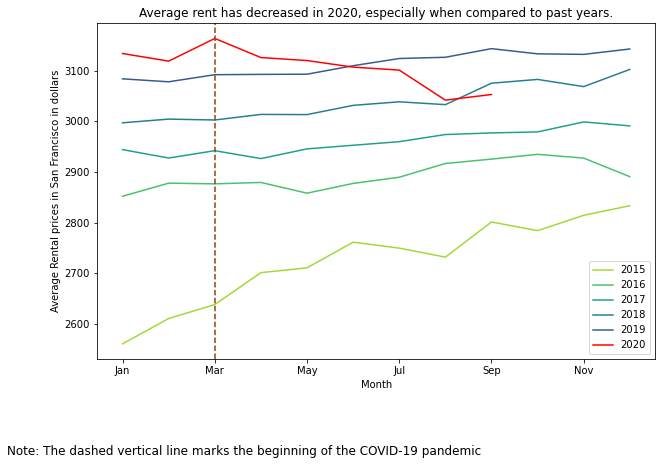

In [30]:
fig,ax=plt.subplots(figsize=(10,10*0.618))
data2015.plot(x="Month", y="Value", ax=ax, label="2015", color = pal[0])
data2016.plot(x="Month", y="Value", ax=ax, label="2016", color = pal[1])
data2017.plot(x="Month", y="Value", ax=ax, label="2017", color = pal[2])
data2018.plot(x="Month", y="Value", ax=ax, label="2018", color = pal[3])
data2019.plot(x="Month", y="Value", ax=ax, label="2019", color = pal[4])
data2020.plot(x="Month", y="Value", ax=ax, label="2020", color = "red")
plt.axvline(x=2, color="saddlebrown", linestyle = "dashed")
plt.ylabel('Average Rental prices in San Francisco in dollars')
plt.figtext(0,-0.09, "Note: The dashed vertical line marks the beginning of the COVID-19 pandemic", fontsize=12, horizontalalignment="left")
plt.title('Average rent has decreased in 2020, especially when compared to past years.');

Clearly, compared to other years when rental rates either remained flat or rose such as in 2014, average monthly rents have declined in 2020. There is a clear shift in the trend of the line after March when the pandemic hit. Since rent is a large portion of most people's expenses it makes sense that as people lose work or income landlords are forced to adjust rents to accomadate. Additionally, many people fled large cities once they were able to work remote, thus decreasing demand for rentals and forcing prices down.